# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Set a global palette
sns.set_palette("viridis")

In [87]:
df=pd.read_csv('CarPrice_project.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

DataSet Information:
Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [89]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [90]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [91]:
print(df.apply(lambda i:i.unique()))

car_ID              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
symboling                                        [3, 1, 2, 0, -1, -2]
CarName             [alfa-romero giulia, alfa-romero stelvio, alfa...
fueltype                                                [gas, diesel]
aspiration                                               [std, turbo]
doornumber                                                [two, four]
carbody               [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                            [rwd, fwd, 4wd]
enginelocation                                          [front, rear]
wheelbase           [88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1...
carlength           [168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176...
carwidth            [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
carheight           [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
curbweight          [2548, 2823, 2337, 2824, 2507, 2844, 2954, 308...
enginetype          

In [92]:
len(df[df.duplicated()])

0

In [93]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

# Looking at the distribution of the dependent variable

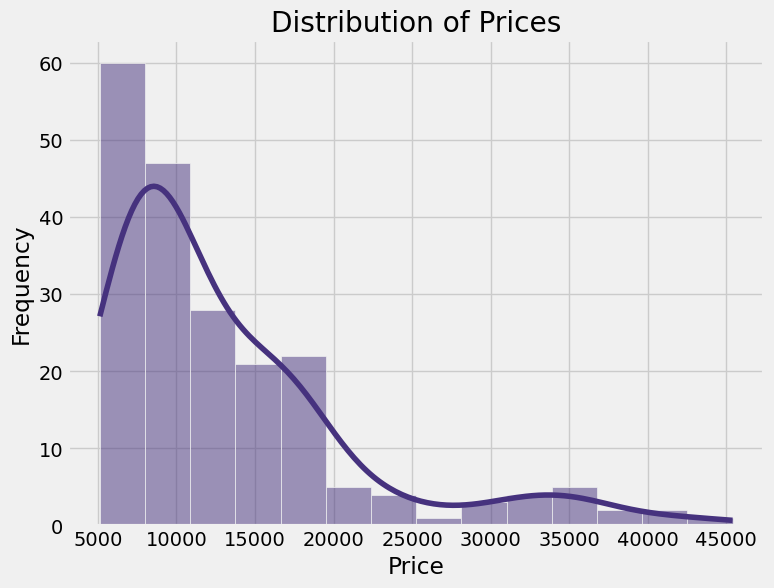

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'],kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [96]:
# The distribution is right-skewed, so we are doing a log transformation

((array([-2.7088841 , -2.40021466, -2.22436022, -2.09847761, -1.99906119,
         -1.91619334, -1.84471334, -1.78157842, -1.72483748, -1.67316142,
         -1.62560232, -1.58145939, -1.54019924, -1.50140611, -1.46474936,
         -1.4299615 , -1.39682292, -1.36515103, -1.33479227, -1.30561622,
         -1.27751112, -1.25038041, -1.22414012, -1.19871667, -1.17404528,
         -1.15006853, -1.12673532, -1.10399994, -1.08182134, -1.0601625 ,
         -1.03898989, -1.01827309, -0.99798434, -0.9780983 , -0.95859171,
         -0.93944323, -0.92063316, -0.90214332, -0.88395686, -0.86605818,
         -0.84843274, -0.83106701, -0.81394837, -0.79706499, -0.78040581,
         -0.76396046, -0.74771918, -0.73167277, -0.71581259, -0.70013046,
         -0.68461865, -0.66926986, -0.65407714, -0.63903392, -0.62413394,
         -0.60937126, -0.59474021, -0.58023538, -0.56585161, -0.55158398,
         -0.53742776, -0.52337843, -0.50943166, -0.49558329, -0.48182931,
         -0.46816589, -0.45458932, -0.

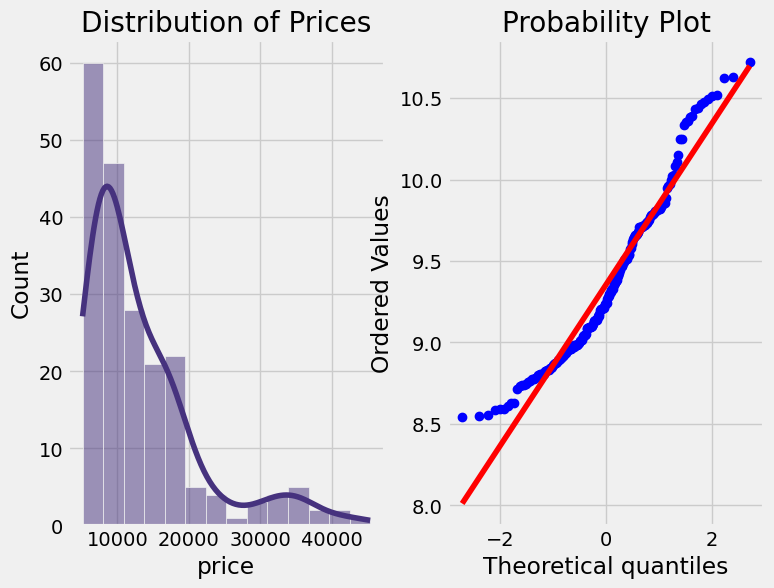

In [97]:
from scipy import stats
import pylab
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True)
plt.title('Distribution of Prices')
plt.subplot(1,2,2)
stats.probplot(np.log(df['price']),dist='norm',plot=pylab)

# Now lets look at the distribution of the independent Numerical variables

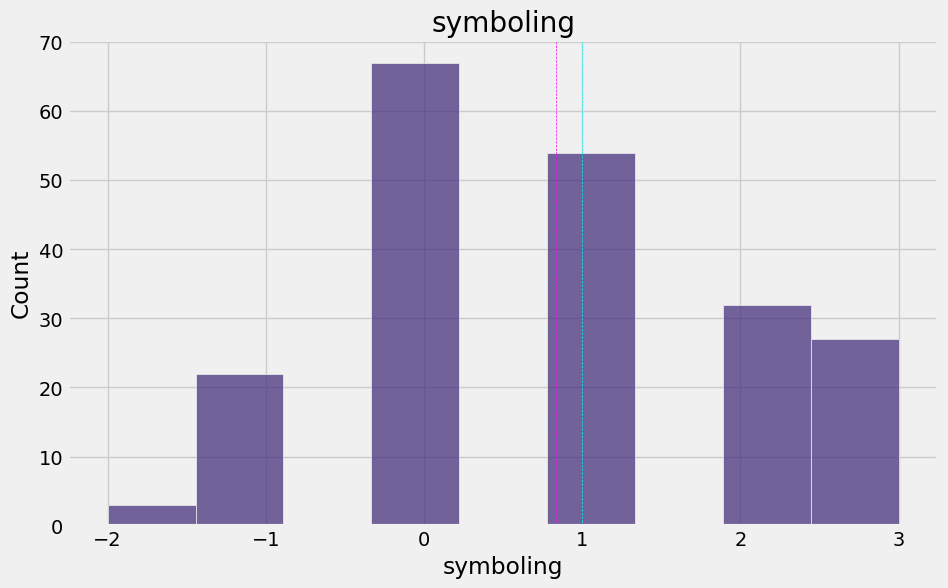

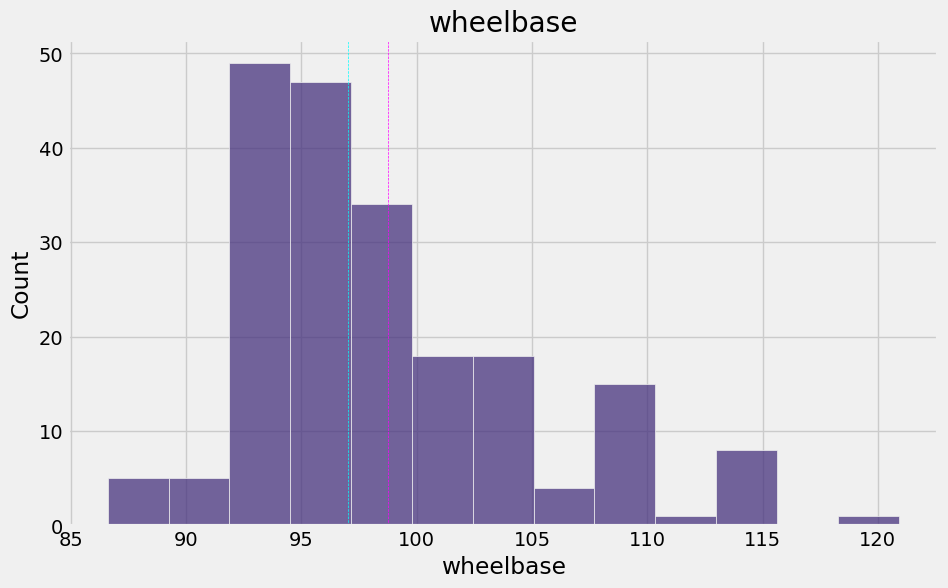

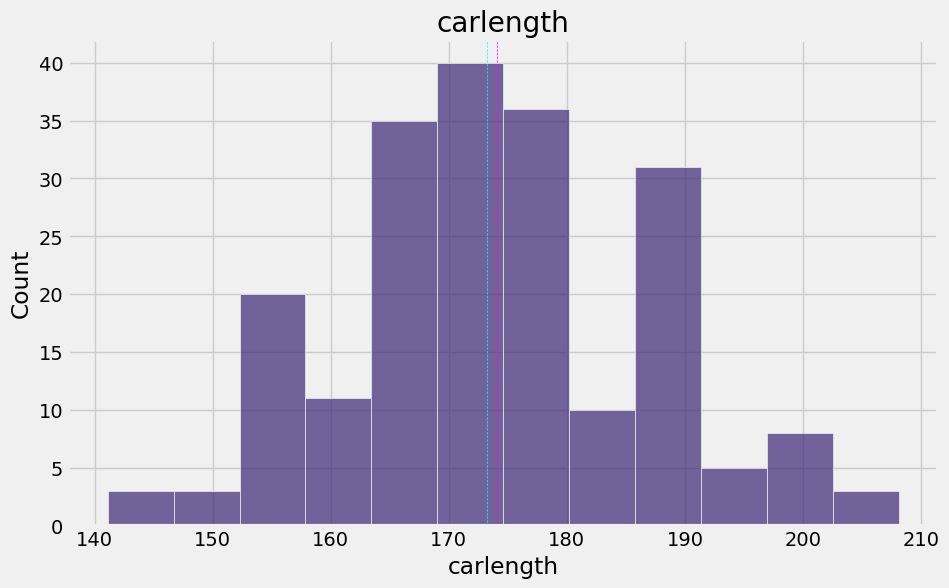

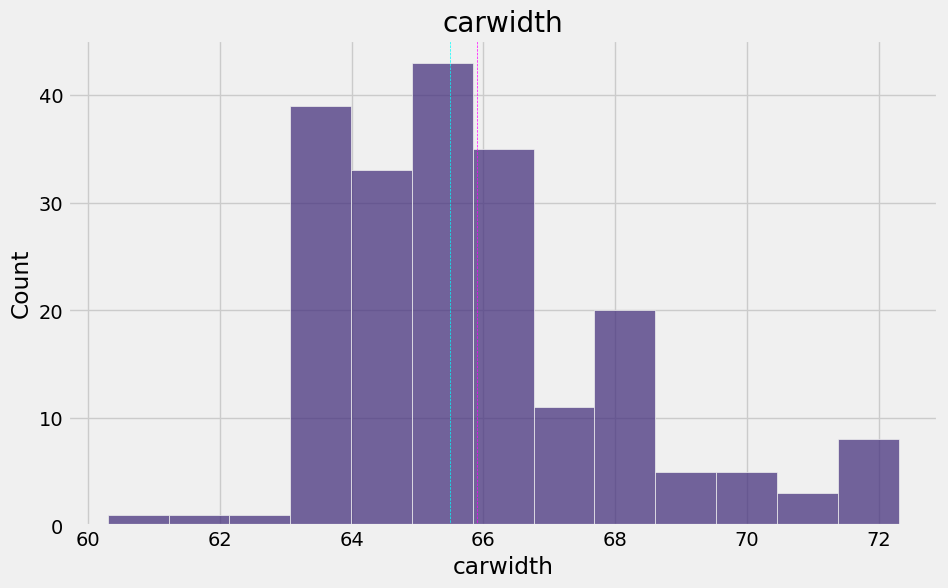

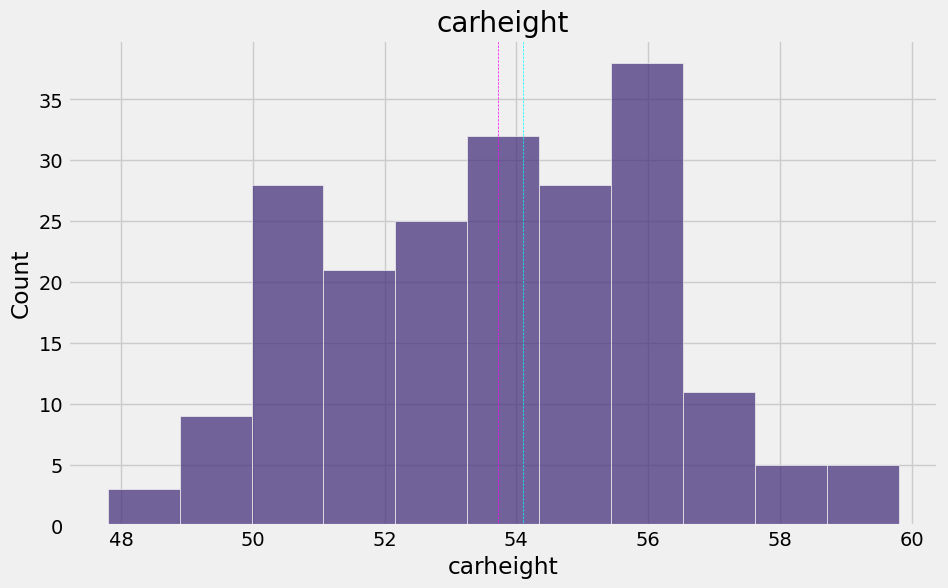

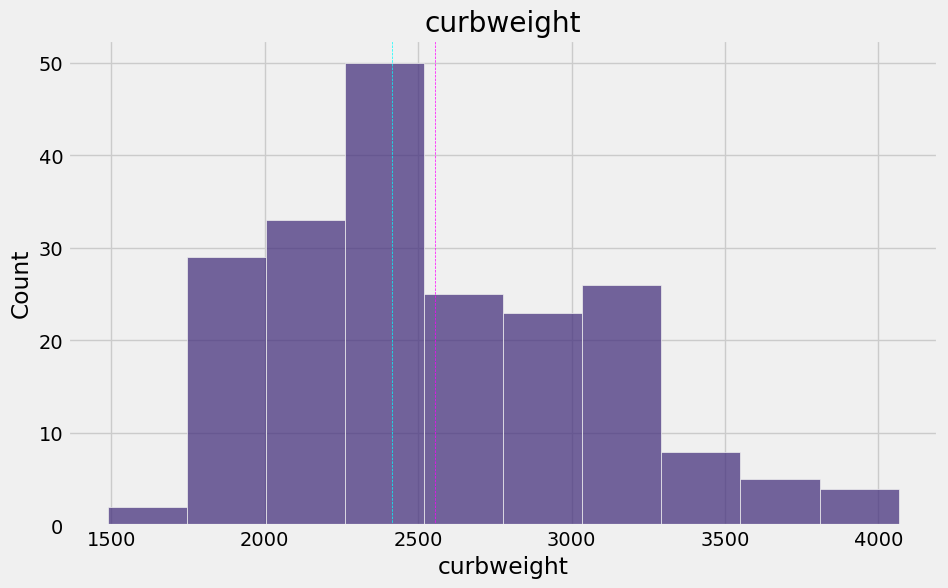

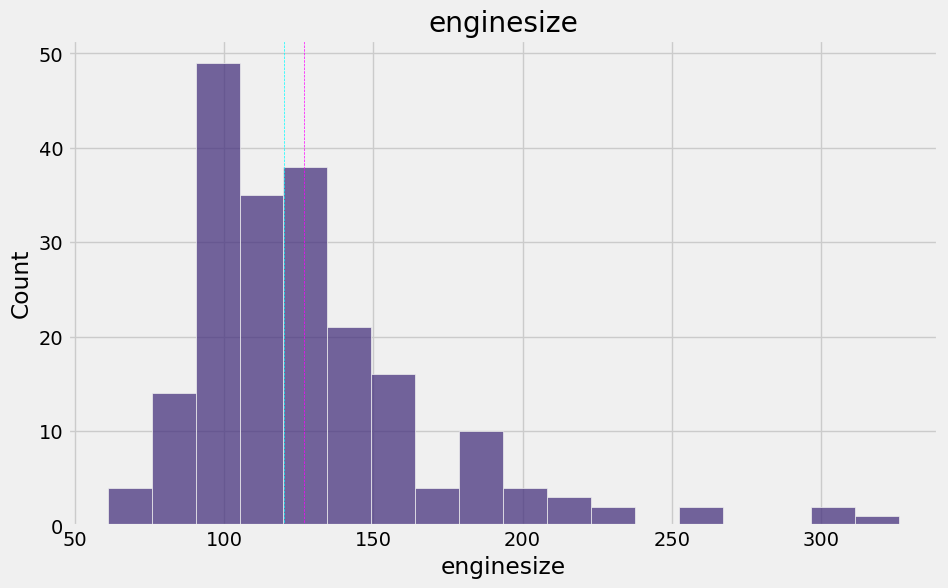

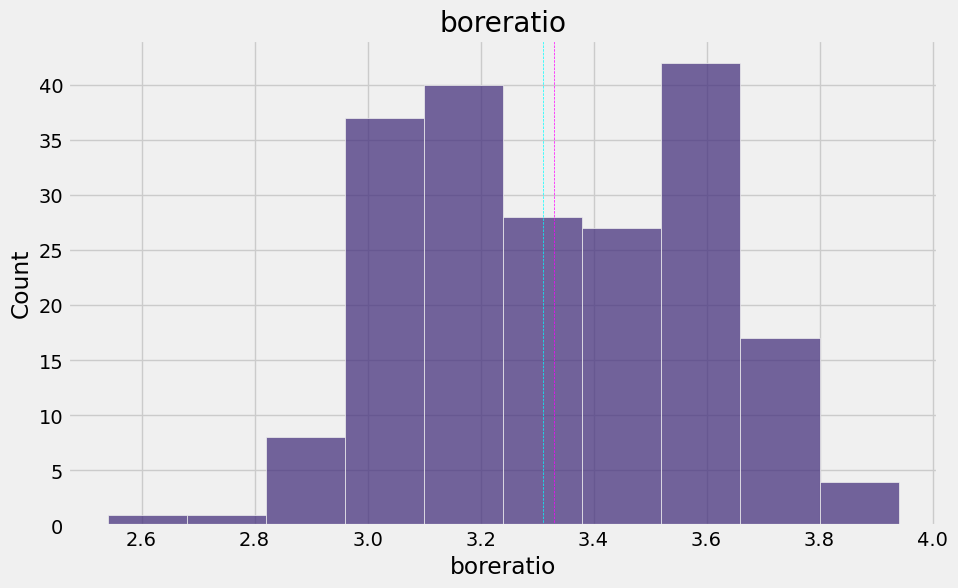

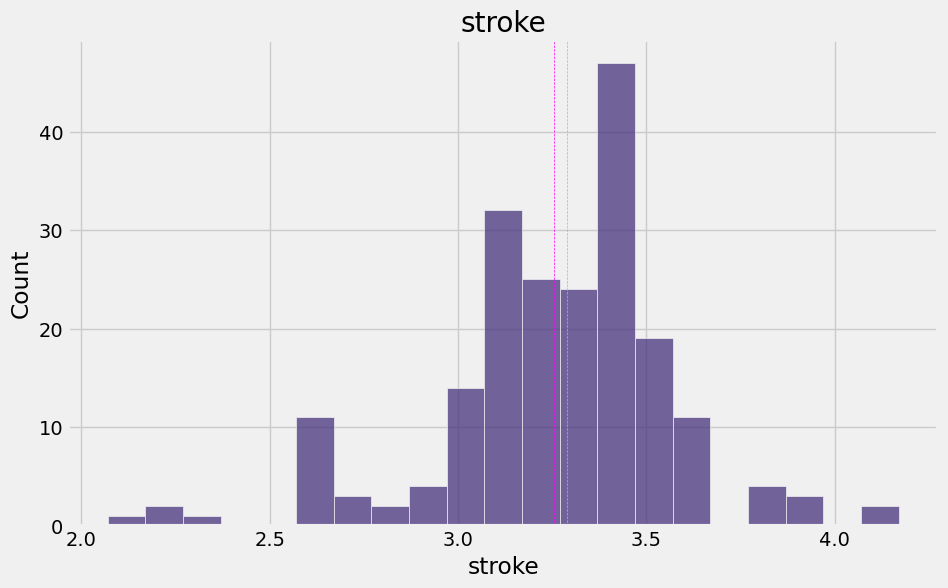

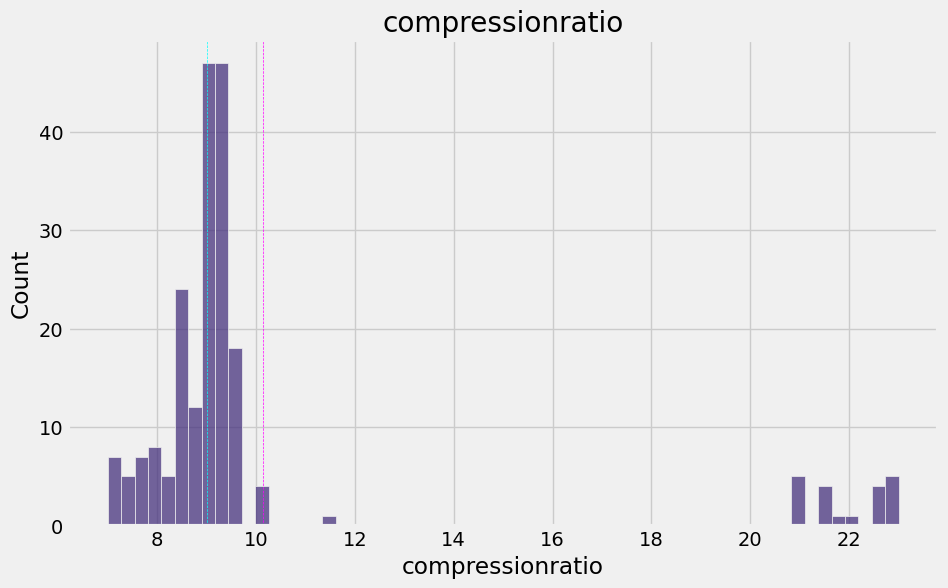

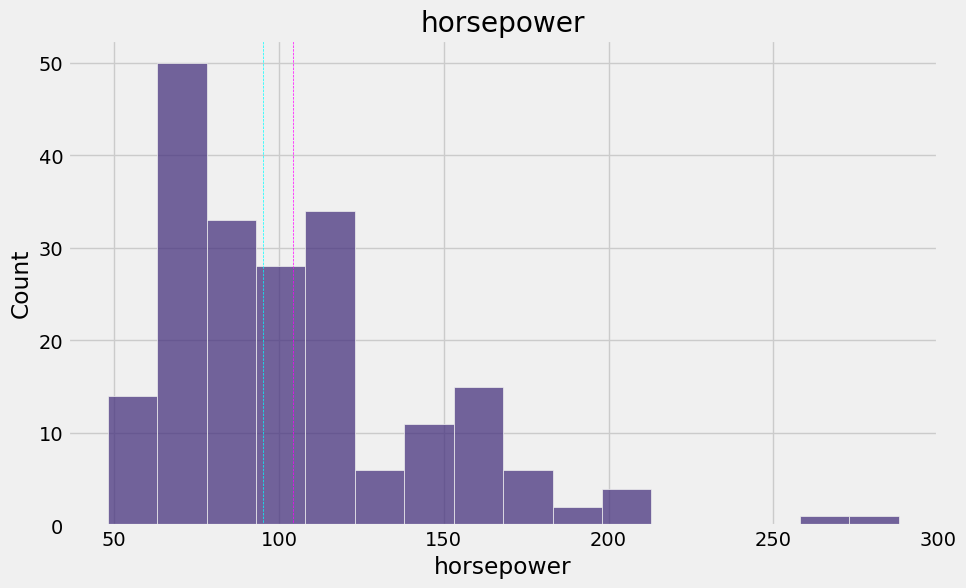

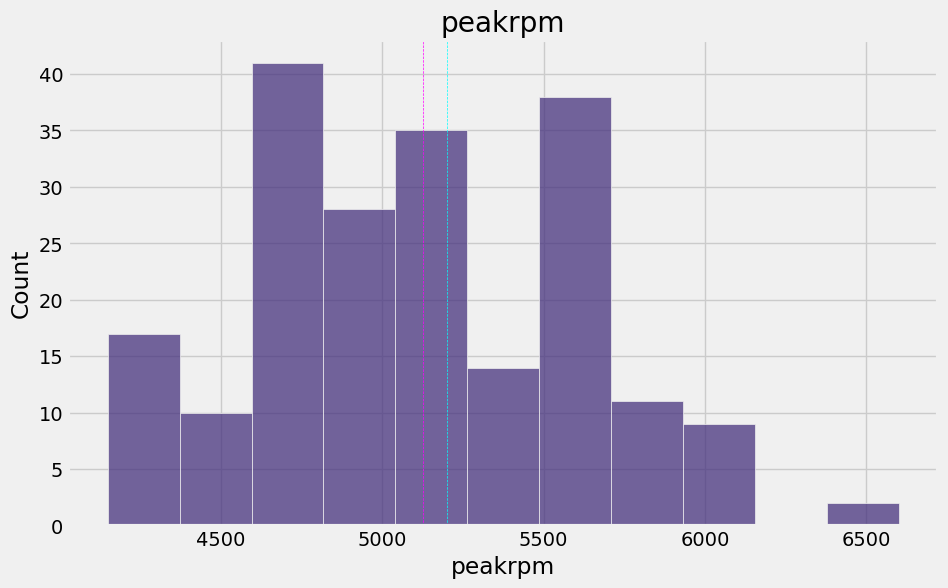

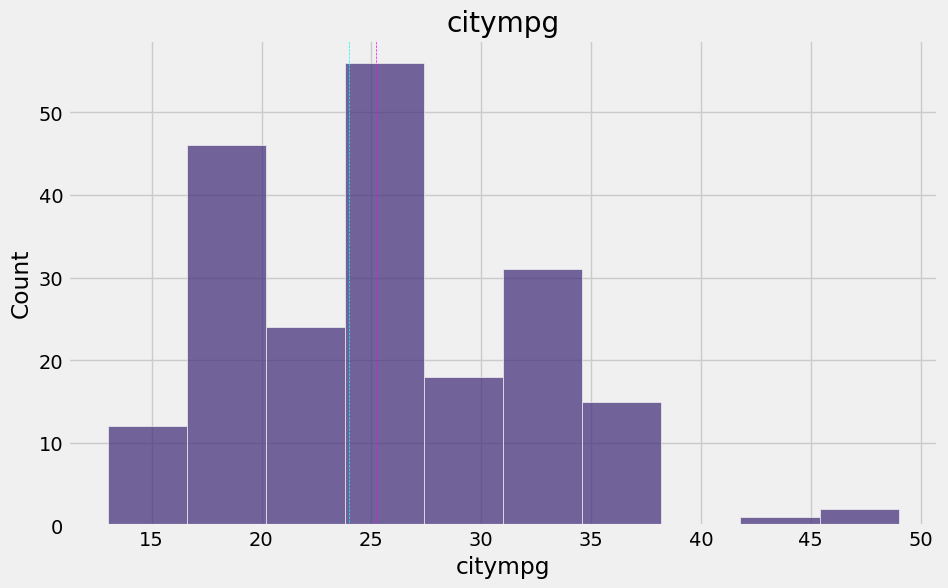

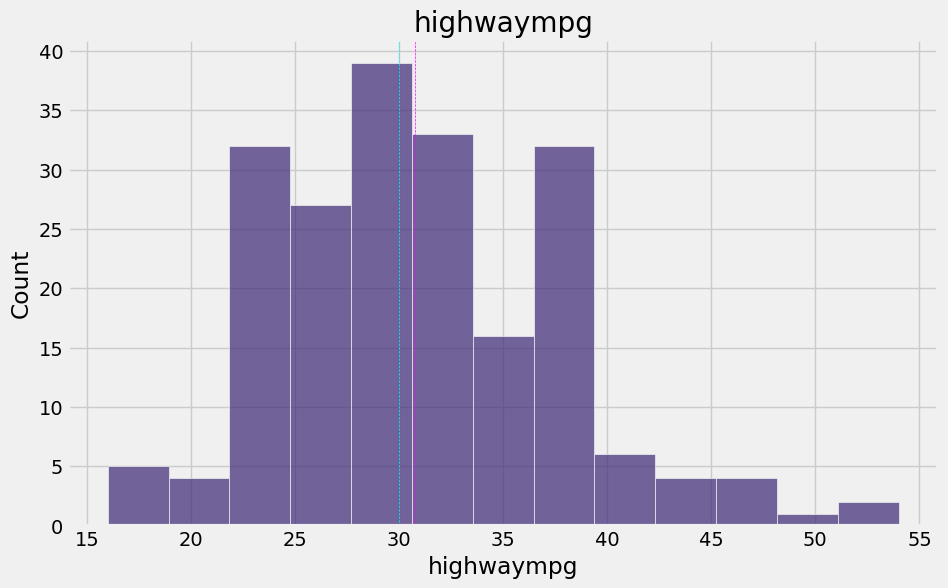

In [98]:
for i in df.describe().columns[1:-1]:
    fig=plt.figure(figsize=(10,6))
    sns.histplot(df[i],kde=False)
    plt.axvline(np.mean(df[i]),color='magenta',linestyle='dashed',linewidth=0.5)
    plt.axvline(np.median(df[i]),color='cyan',linestyle='dashed',linewidth=0.5)
    plt.title(f'{i}')

# Now lets look at the correlation between the numerical features and the dependent variable

<Figure size 1000x600 with 0 Axes>

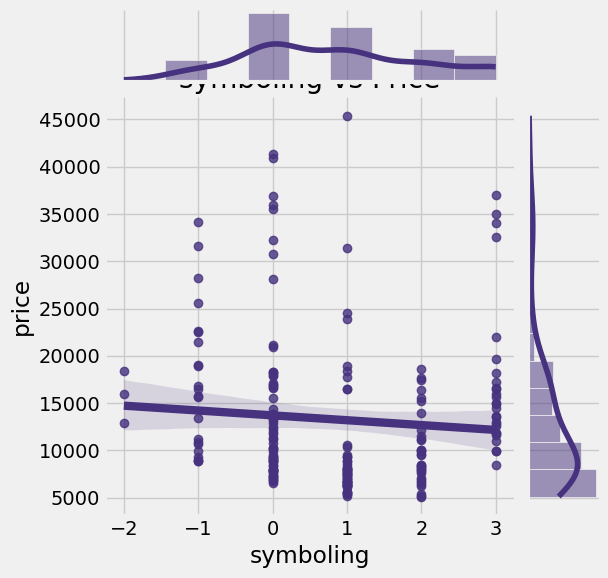

<Figure size 1000x600 with 0 Axes>

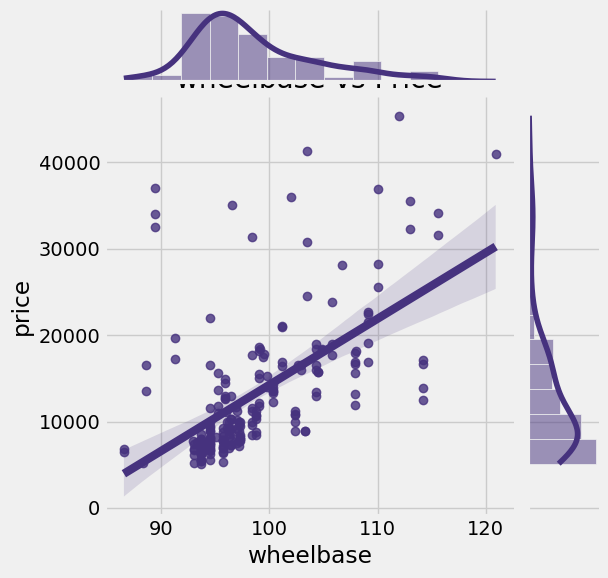

<Figure size 1000x600 with 0 Axes>

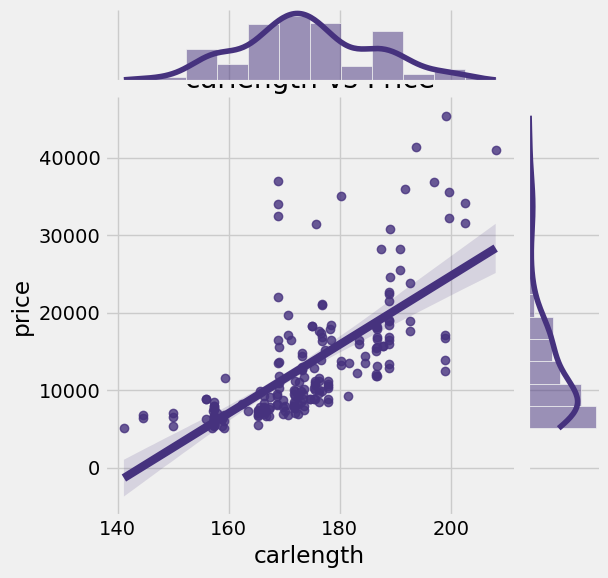

<Figure size 1000x600 with 0 Axes>

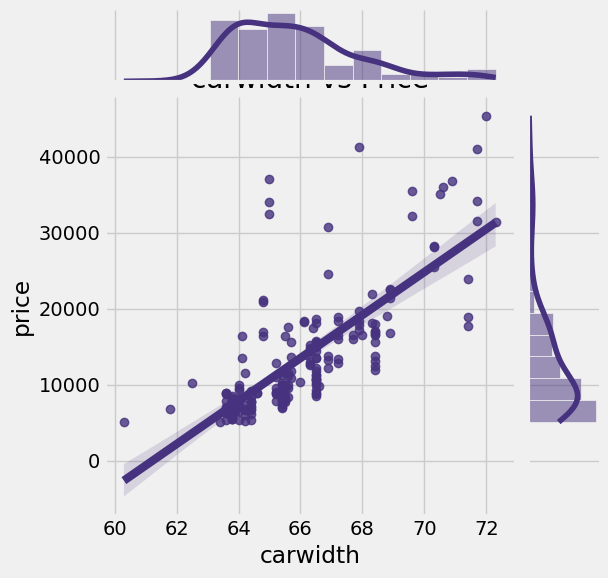

<Figure size 1000x600 with 0 Axes>

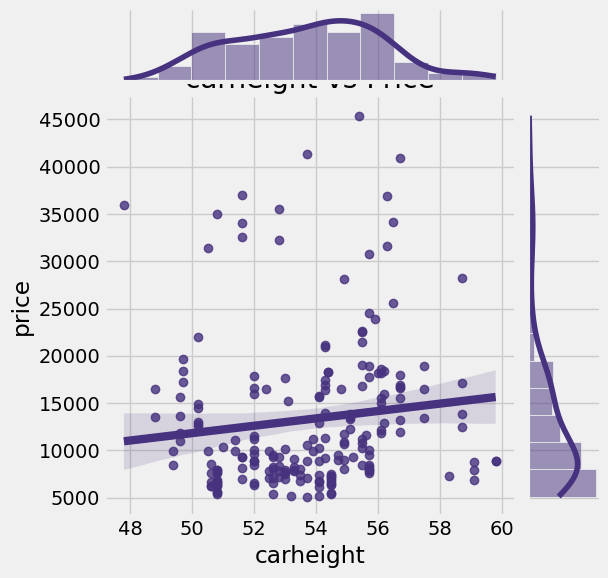

<Figure size 1000x600 with 0 Axes>

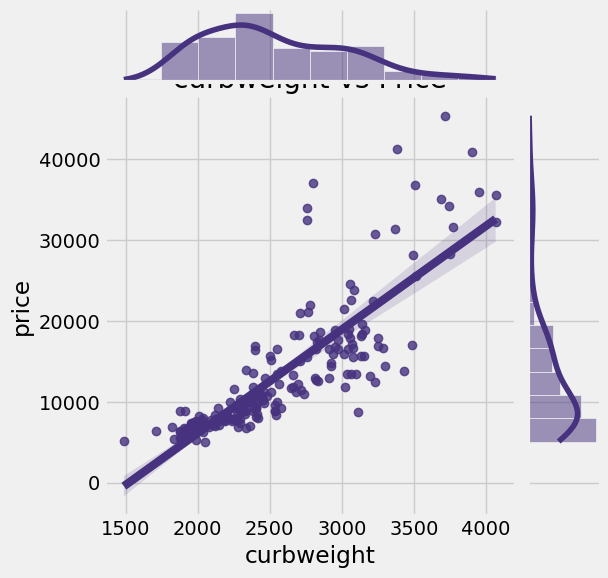

<Figure size 1000x600 with 0 Axes>

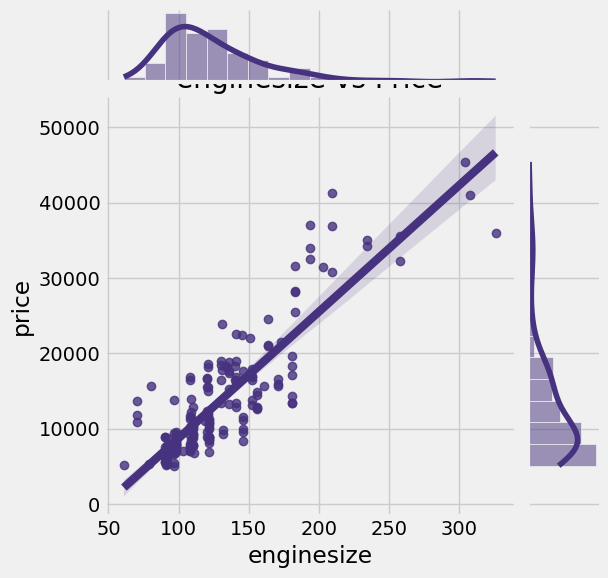

<Figure size 1000x600 with 0 Axes>

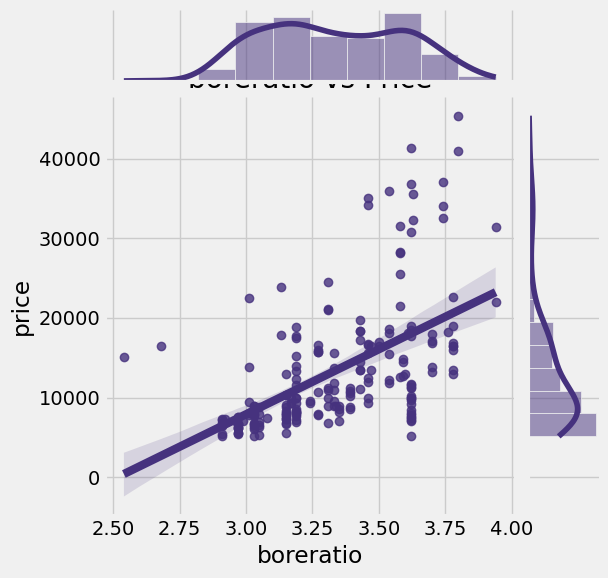

<Figure size 1000x600 with 0 Axes>

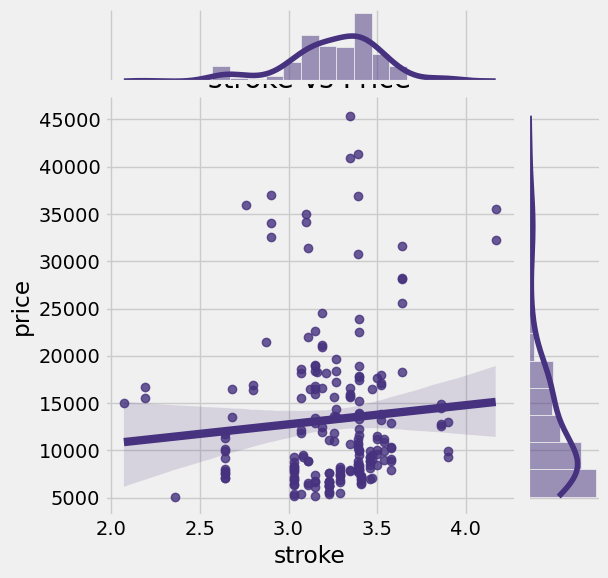

<Figure size 1000x600 with 0 Axes>

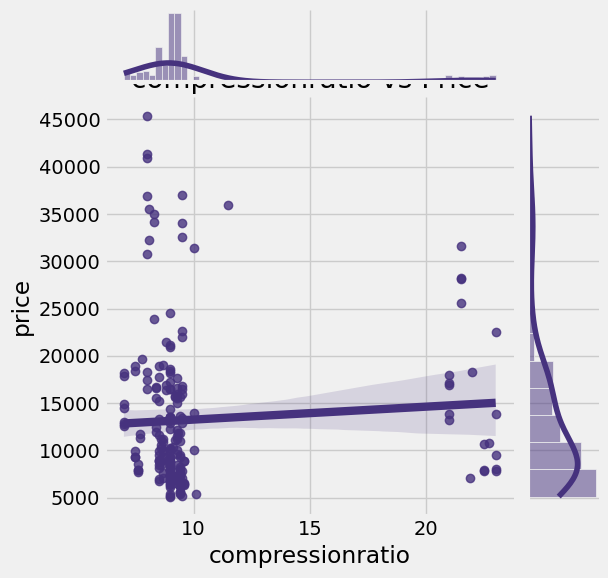

<Figure size 1000x600 with 0 Axes>

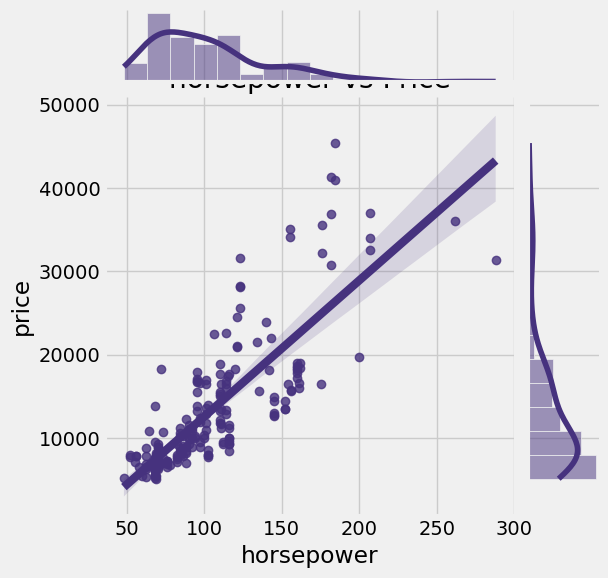

<Figure size 1000x600 with 0 Axes>

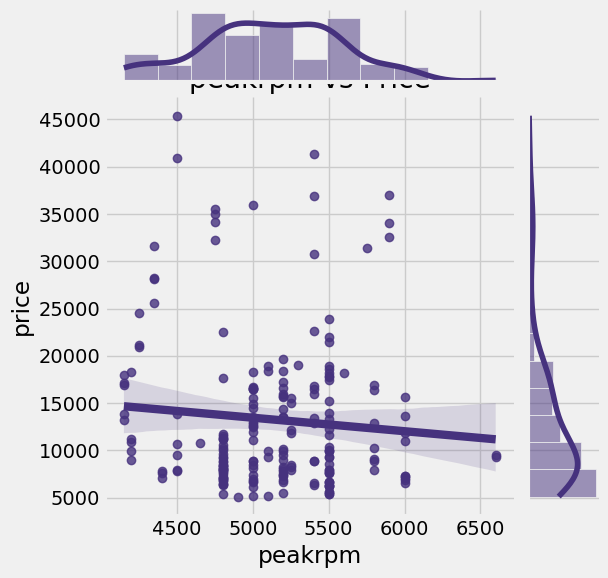

<Figure size 1000x600 with 0 Axes>

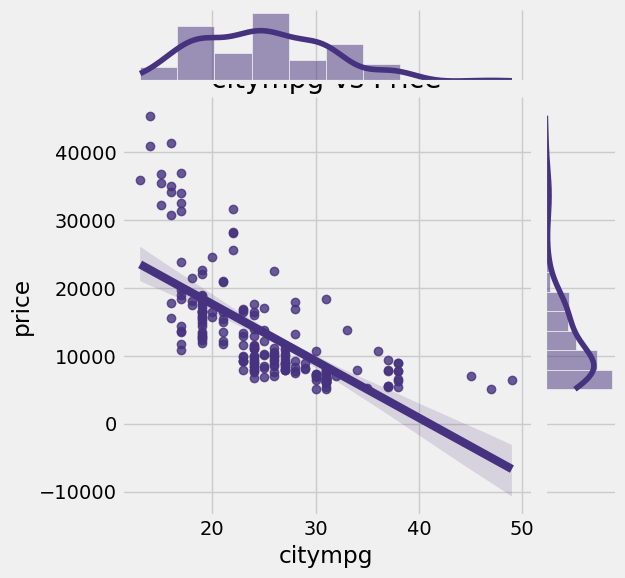

<Figure size 1000x600 with 0 Axes>

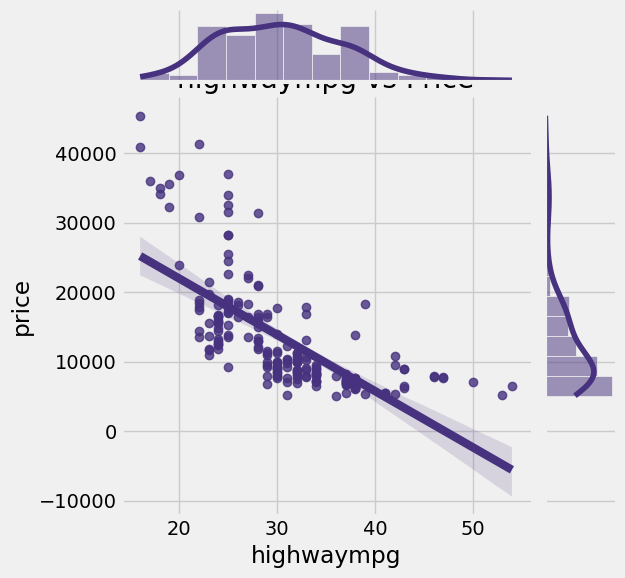

In [99]:
for i in df.describe().columns[1:-1]:
    fig=plt.figure(figsize=(10,6))
    sns.jointplot(x=df[i],y=df['price'],kind='reg')
    plt.title(f'{i} vs Price')

# Now Lets check Multicollinearity 

# Lets do VIF Ananlysis

<AxesSubplot:>

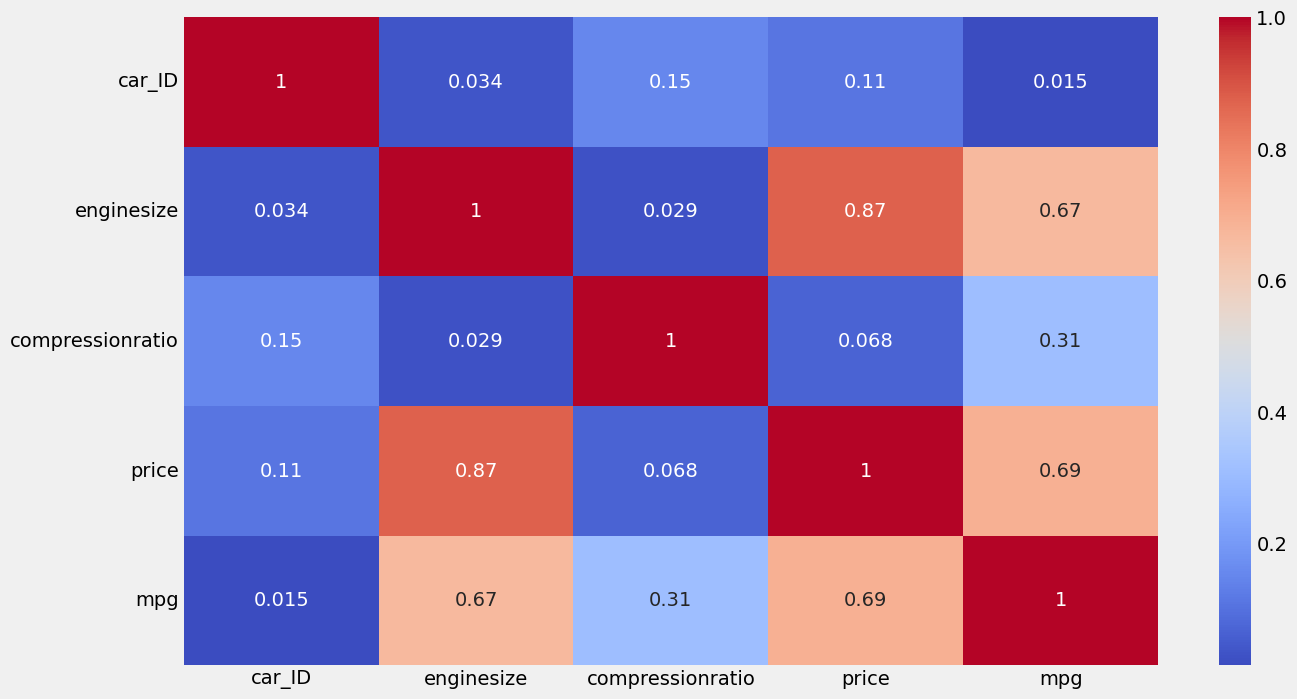

In [118]:
corr=df[df.describe().columns].corr()
plt.figure(figsize=(14,8))
sns.heatmap(abs(corr),fmt='.2g',annot=True,cmap='coolwarm')

In [119]:
numeric_features=[i for i in df.describe().columns if i not in ['car_ID','price']]

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
def get_vif(x):
    vif=[]
    for i in range(len(numeric_features)):
        vif.append(variance_inflation_factor(df[numeric_features],i))
    vif=pd.DataFrame({'vif':vif},index=numeric_features)
    return vif

In [120]:
get_vif(numeric_features)

,vif
enginesize,5.143983
compressionratio,9.175480
mpg,8.169561


In [105]:
# combining carlength and carwidth since they have high correlation with each other
df['cararea']=df['carlength']*df['carwidth']
df.drop(columns=['carlength','carwidth'],axis=1,inplace=True)

In [109]:
# Wheelbase and cararea are correlated and cararea affets the price more than wheelbase
df.drop(columns=['wheelbase'],axis=1,inplace=True)

In [110]:
# combining citympg and highwaympg since they have high correlation with each other
df['mpg']=0.7*df['citympg']+0.3*df['highwaympg']
df.drop(columns=['citympg','highwaympg'],axis=1,inplace=True)

In [111]:
# curbweight and cararea are correlated and curbweight affets the price more than cararea
df.drop(columns=['cararea'],axis=1,inplace=True)

In [112]:
# curbweight and enginesize are correlated and enginesize affets the price more than curbweight
df.drop(columns=['curbweight'],axis=1,inplace=True)

In [113]:
# horsepower and enginesize are correlated and enginesize affets the price more than horsepower
df.drop(columns=['horsepower'],axis=1,inplace=True)

In [114]:
# boreratio and enginesize are correlated and enginesize affets the price more than boreratio
df.drop(columns=['boreratio'],axis=1,inplace=True)

In [115]:
df.drop(columns=['carheight'],axis=1,inplace=True)

In [116]:
#peakrpm and stroke doesnot affect the price much
df.drop(columns=['peakrpm','stroke'],axis=1,inplace=True)

In [117]:
df.drop(columns=['symboling'],axis=1,inplace=True)

In [121]:
print(numeric_features)

['enginesize', 'compressionratio', 'mpg']


# After VIF Analysis we are left with these 3 numerical features

In [122]:
# Some more data cleaning and analysis needs to be done
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [124]:
# Lets check company wise count
df['company_cat']=df['CarName'].str.split(" ",expand=True)[0]
df['company_cat']=df['company_cat'].str.title()
df['company_cat']=df['company_cat'].replace({'Toyouta':'Toyota','Vw':'Volkswagen','Porcshce':'Porsche','Maxda':'Mazda','Vokswagen':'Volkswagen'})
df['company_cat'].value_counts()

company_cat
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: count, dtype: int64

# Now Lets check the categorical features

In [125]:
categorical_features=df.describe(include='object').columns
categorical_features

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company_cat'],
      dtype='object')

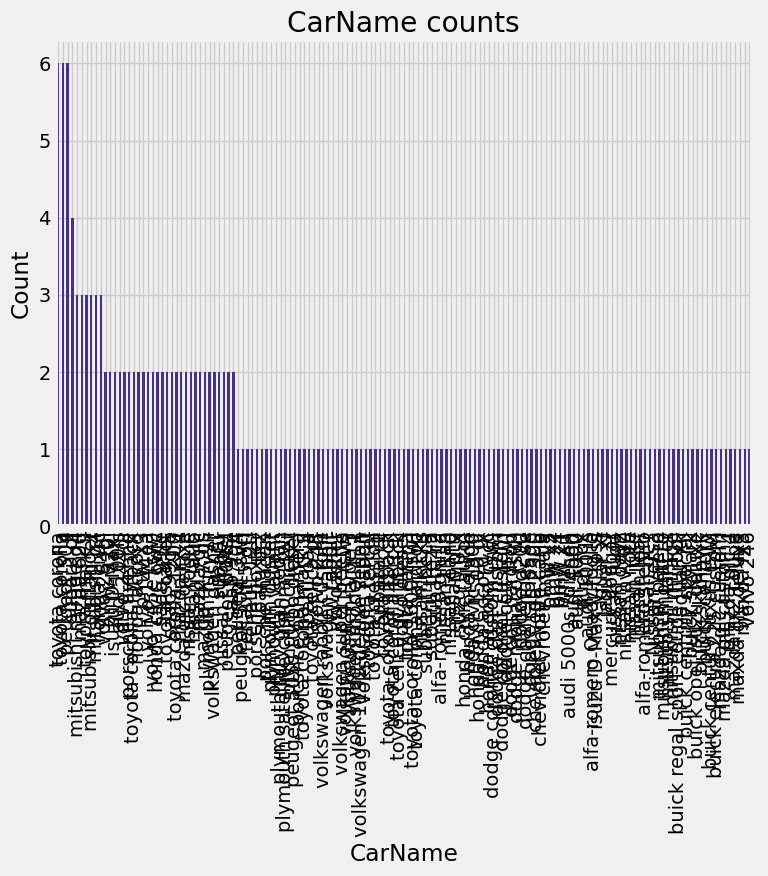

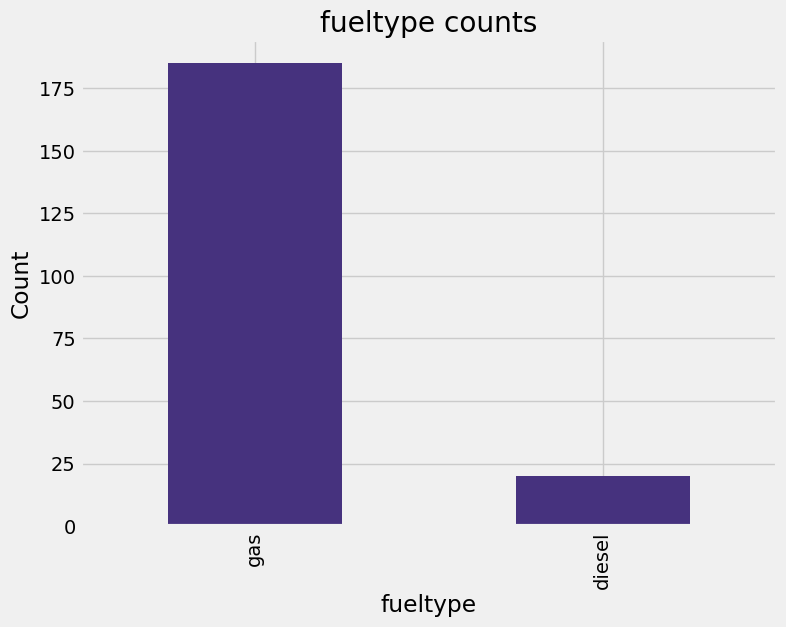

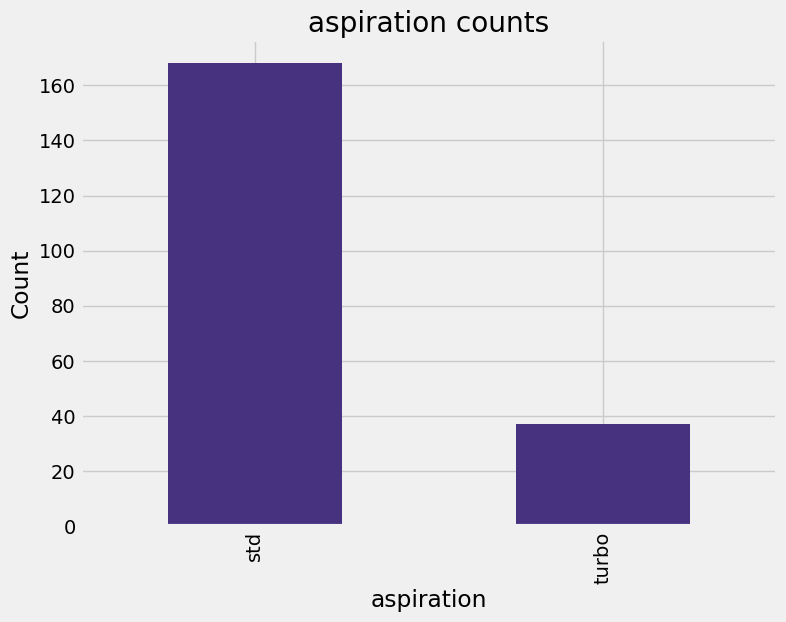

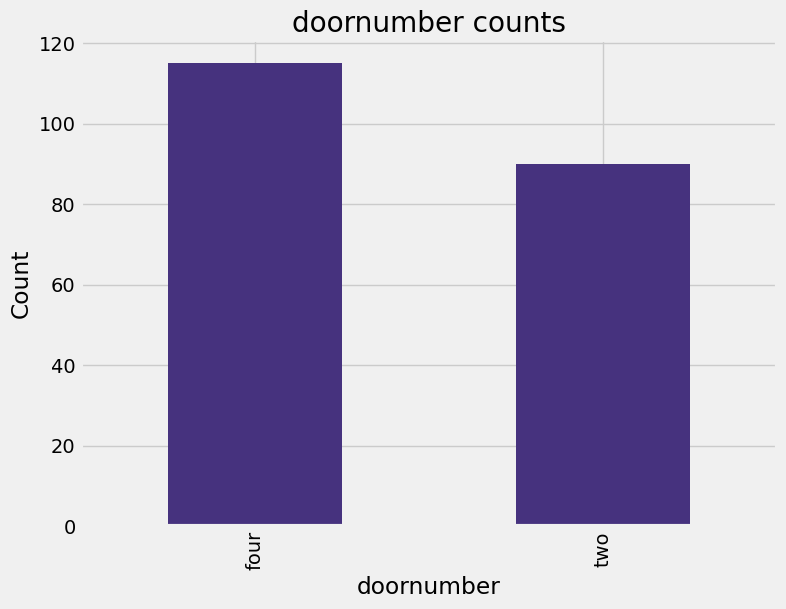

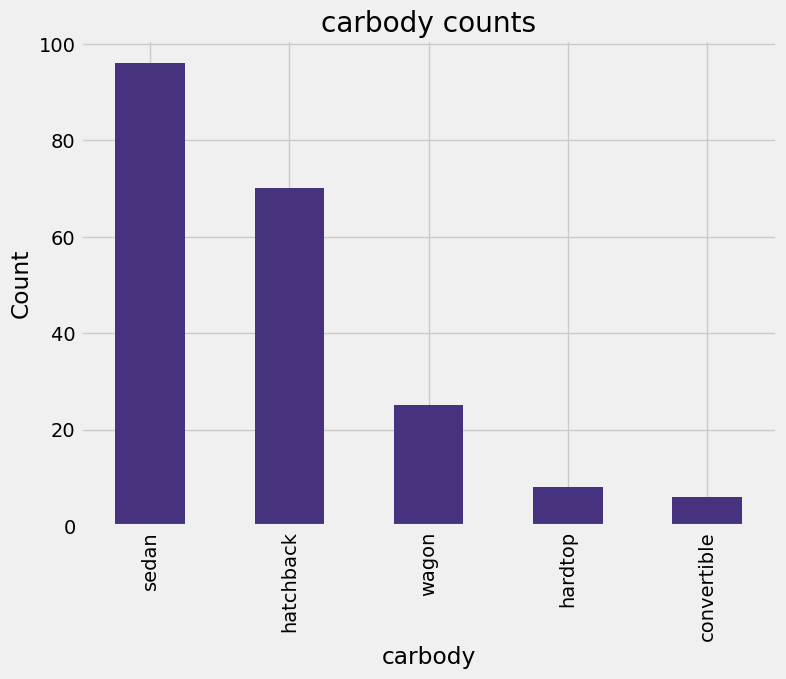

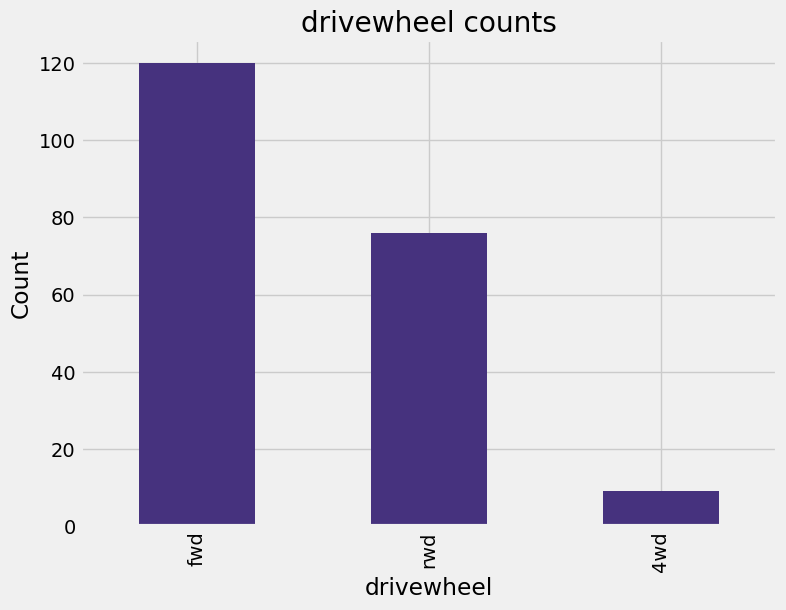

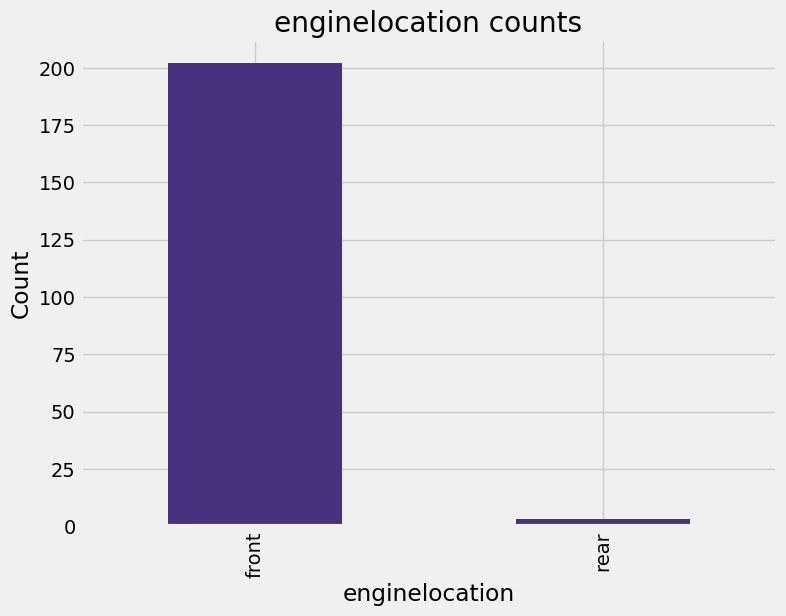

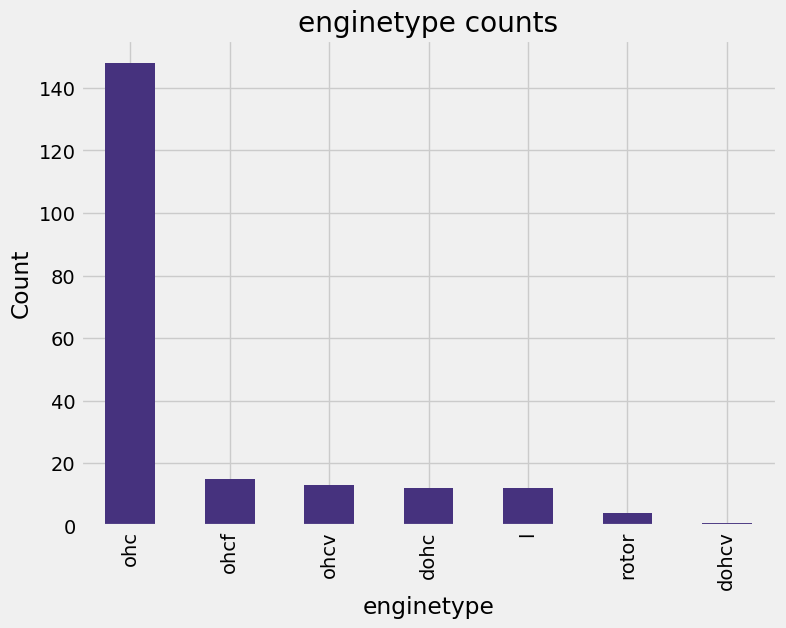

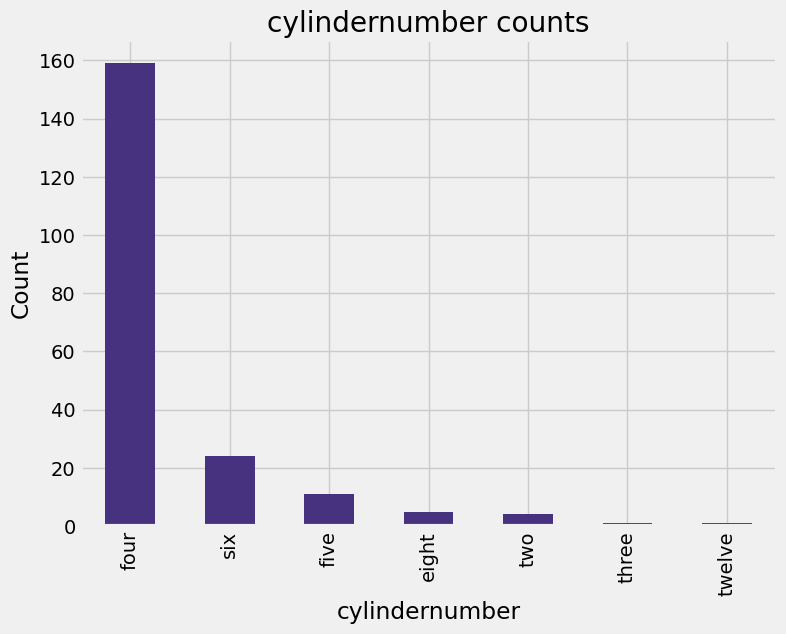

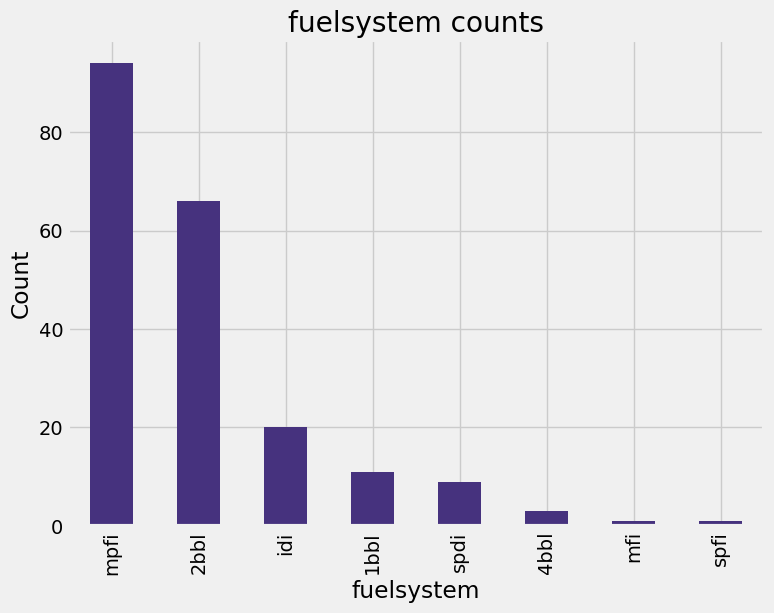

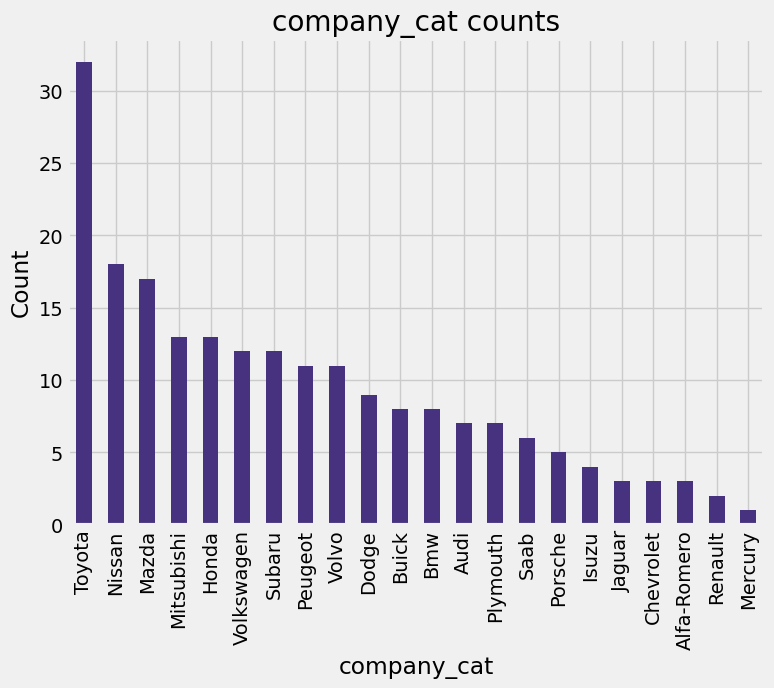

In [126]:
for i in df[categorical_features]:
    fig=plt.figure(figsize=(8,6))
    df[i].value_counts().plot(kind='bar')
    plt.title(f'{i} counts')
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

# Checking how price is dependent on different categories

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


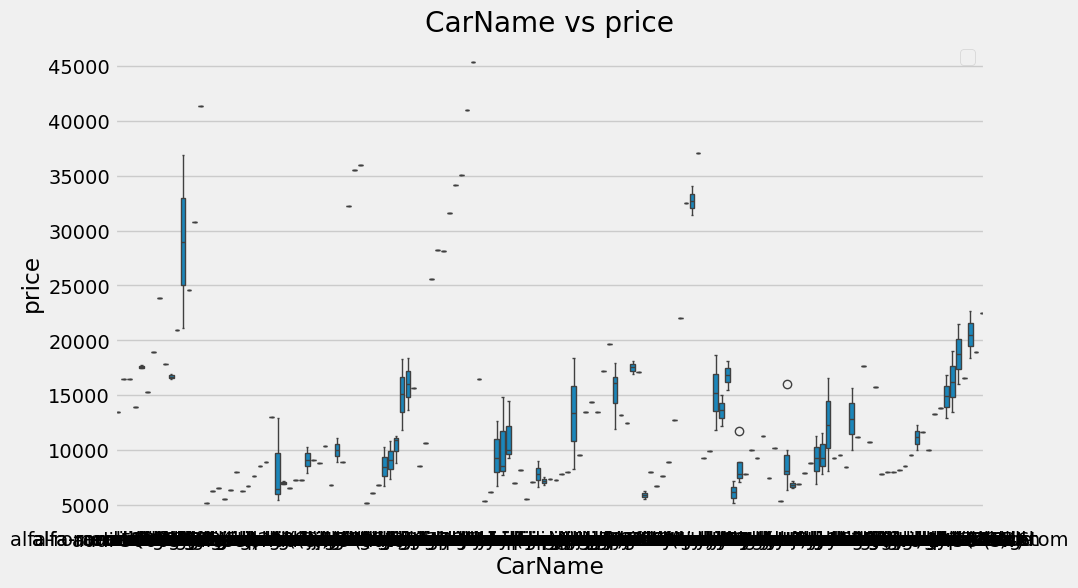

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


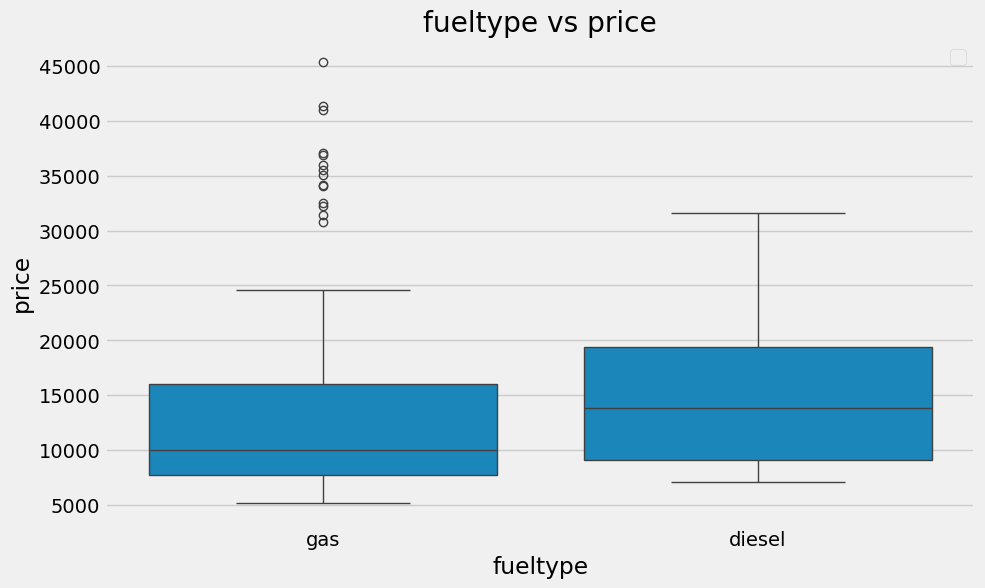

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


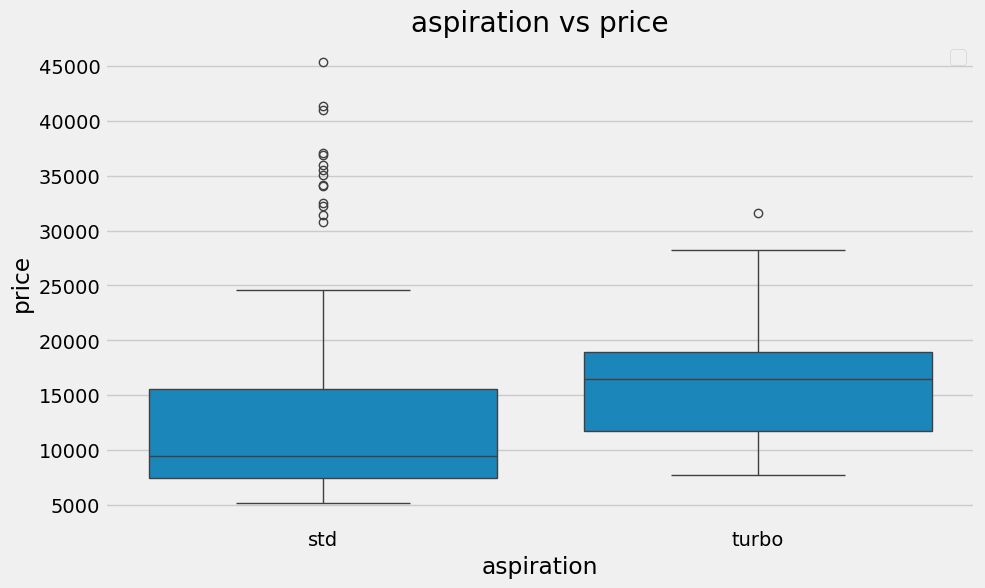

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


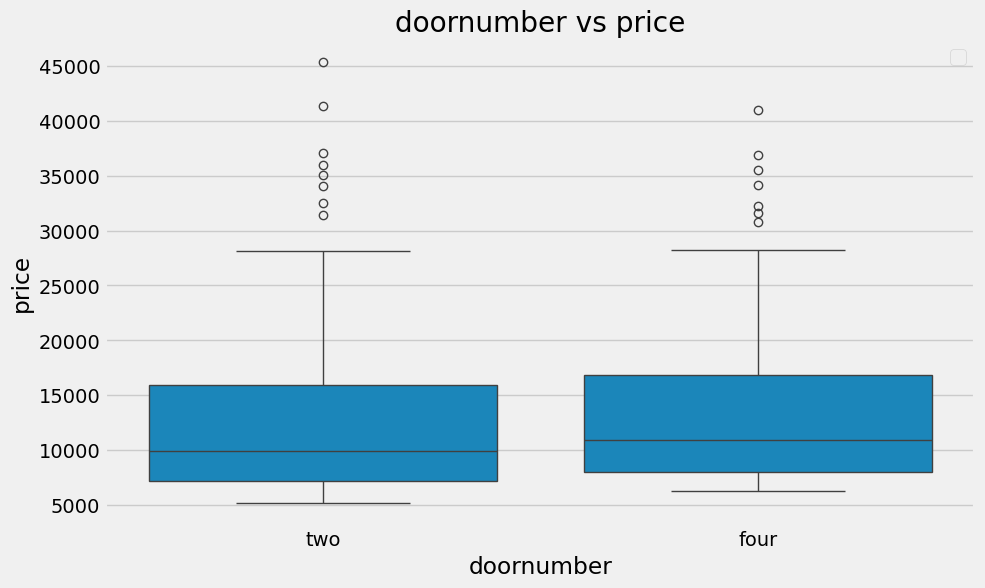

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


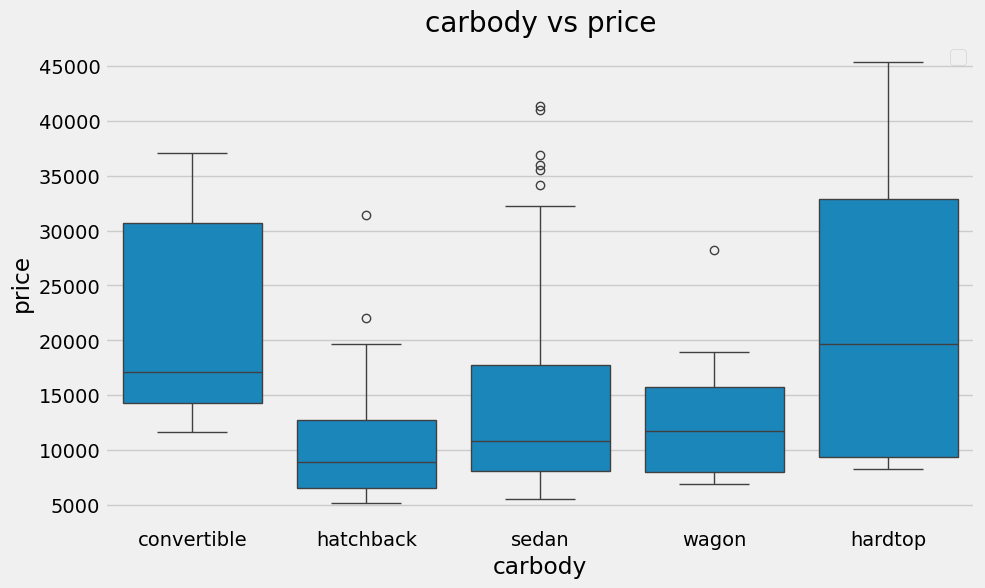

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


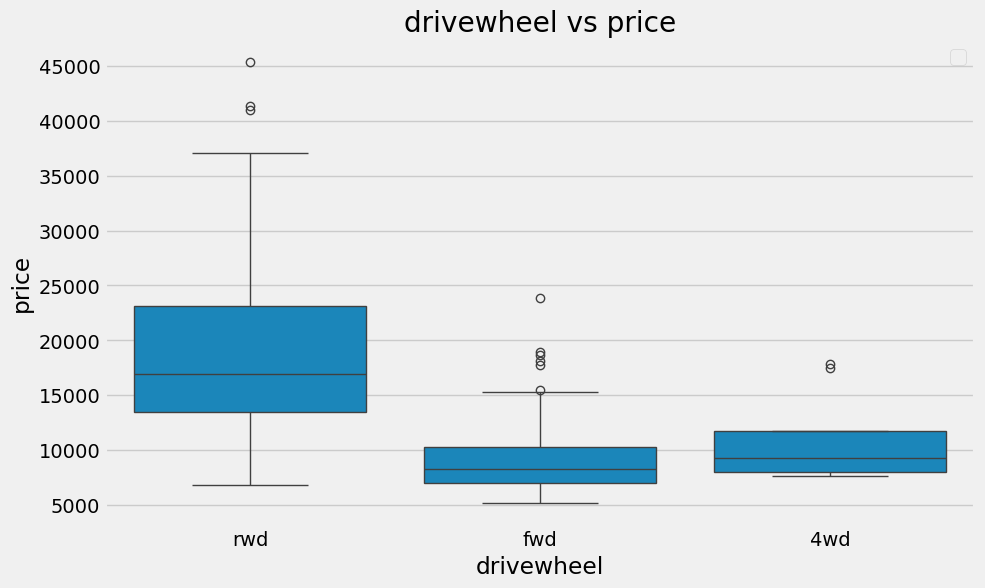

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


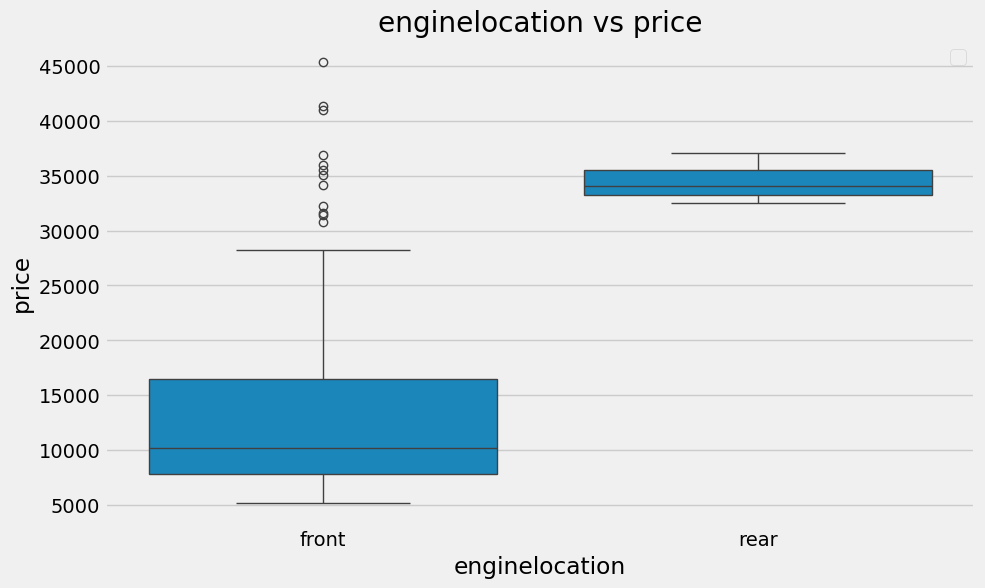

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


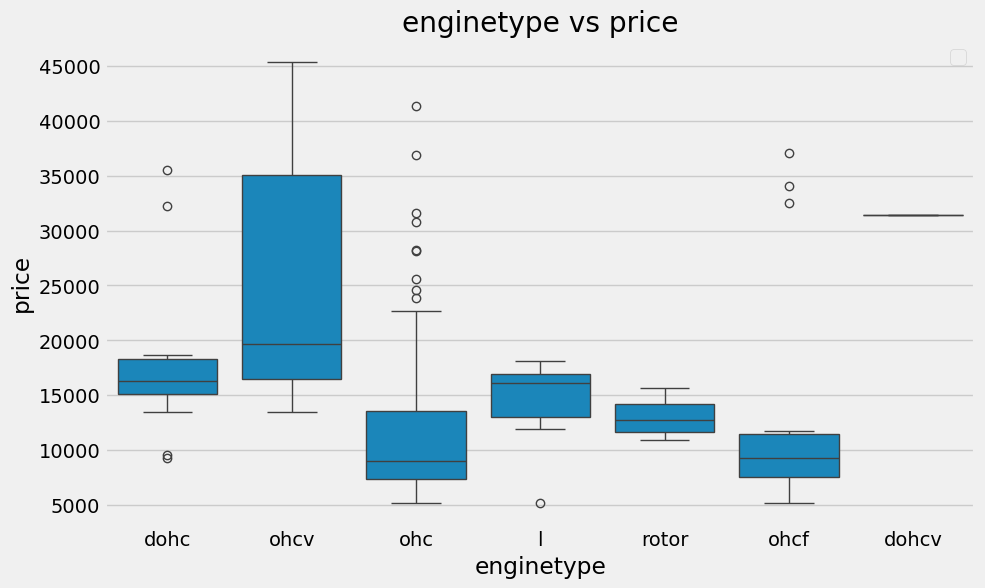

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


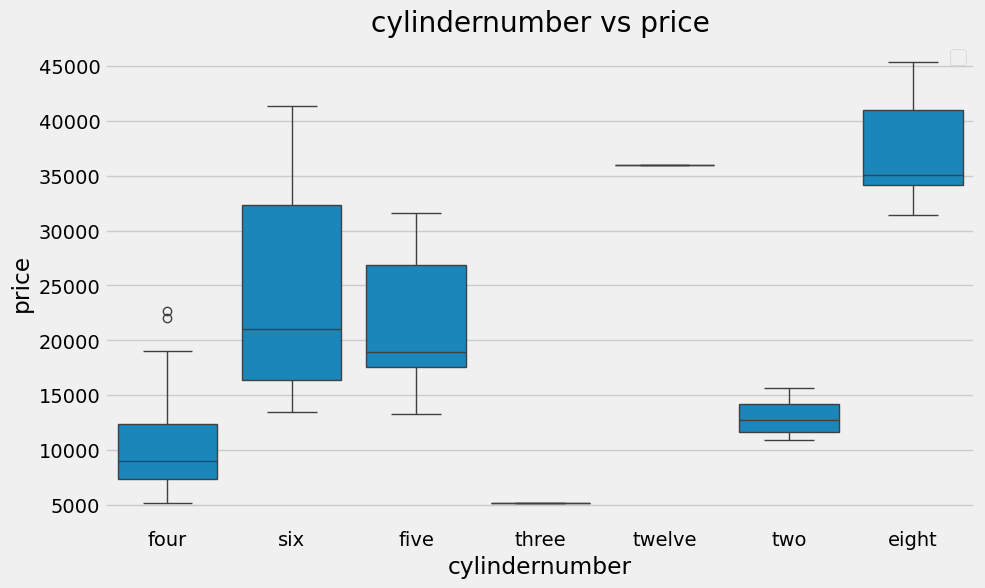

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


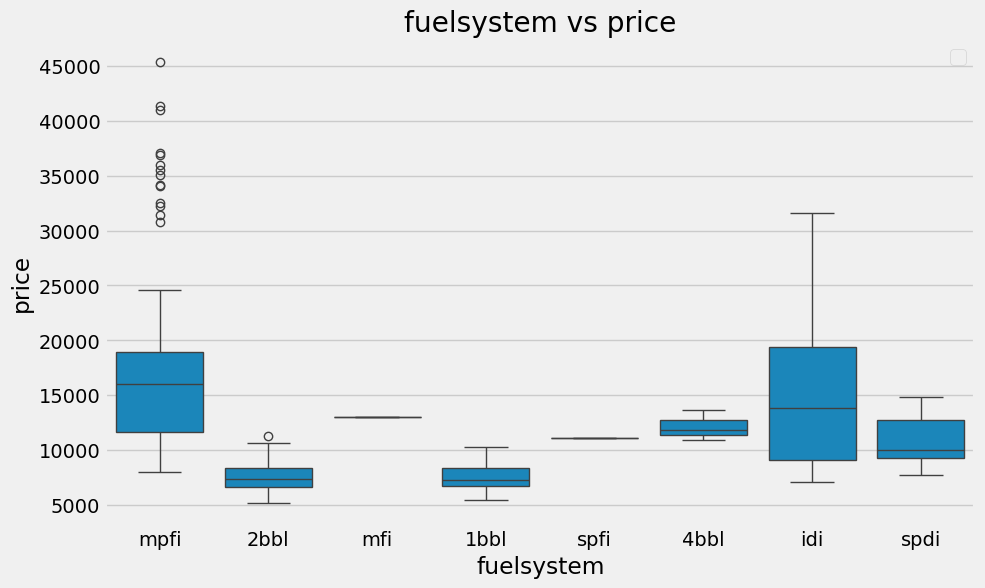

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


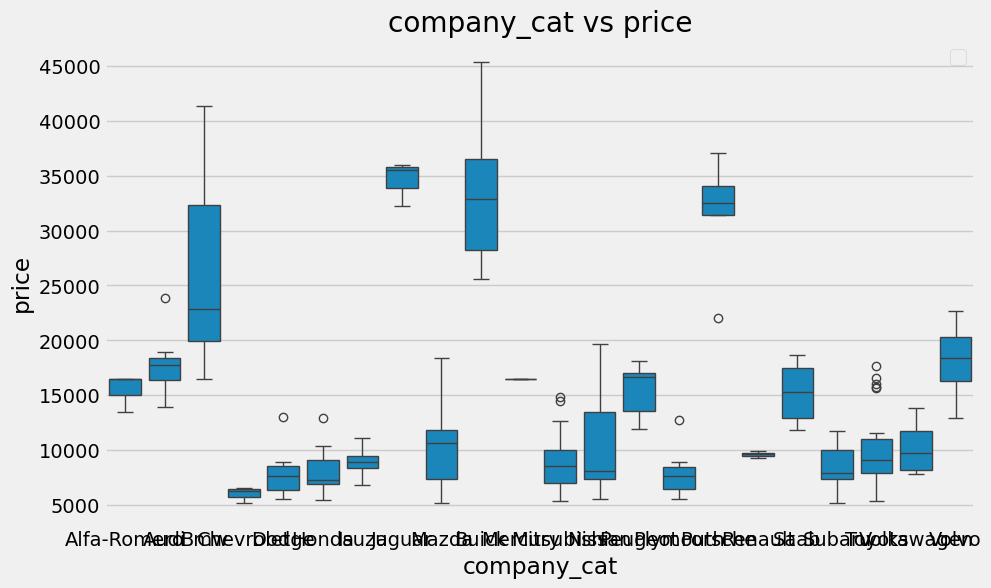

In [127]:

for i in df[categorical_features]:
    fig=plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    sns.boxplot(x=df[i],y=df['price'])
    plt.title(f'{i} vs price')
    plt.legend()
    plt.show()

# Checking Companywise car price

In [128]:
df_autox=pd.DataFrame(df.groupby('company_cat')['price'].mean())
df_autox.rename(columns={'price':'pricemean'},inplace=True)
df_autox

,pricemean
company_cat,
Alfa-Romero,15498.333333
Audi,17859.166714
Bmw,26118.750000
Buick,33647.000000
Chevrolet,6007.000000
Dodge,7875.444444
Honda,8184.692308
Isuzu,8916.500000
Jaguar,34600.000000


In [129]:
df2=df.merge(df_autox,how='left',on='company_cat')
df2.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,price,mpg,company_cat,pricemean
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,9.0,13495.0,22.8,Alfa-Romero,15498.333333
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,9.0,16500.0,22.8,Alfa-Romero,15498.333333
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,9.0,16500.0,21.1,Alfa-Romero,15498.333333
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,10.0,13950.0,25.8,Audi,17859.166714
4,5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,8.0,17450.0,19.2,Audi,17859.166714


#Lets do encoding on company column 

In [130]:
df2['company_cat']=df2['pricemean'].apply(lambda x: 0 if 12000>x else(1 if 12000<x<24000  else 2))

In [131]:
df2.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,price,mpg,company_cat,pricemean
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,9.0,13495.0,22.8,1,15498.333333
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,9.0,16500.0,22.8,1,15498.333333
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,9.0,16500.0,21.1,1,15498.333333
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,10.0,13950.0,25.8,1,17859.166714
4,5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,8.0,17450.0,19.2,1,17859.166714


In [132]:
df2['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [133]:
df2['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [134]:
df2.drop(['car_ID','CarName'],axis=1,inplace=True)

# Encoding the features

In [135]:
encoding_nums={'fueltype':{'gas':1,'diesel':0},
               'doornumber': {'two':2,'four':4},
               'drivewheel': {'rwd':1,'fwd':0,'4wd':0},
               'cylindernumber': {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12},
               'aspiration': {'turbo':0,'std':1}
              }

In [136]:
df2.replace(encoding_nums,inplace=True)

In [137]:
df2.drop(columns=['enginelocation','pricemean'],inplace=True)

In [138]:
df2.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,price,mpg,company_cat
0,1,1,2,convertible,1,dohc,4,130,mpfi,9.0,13495.0,22.8,1
1,1,1,2,convertible,1,dohc,4,130,mpfi,9.0,16500.0,22.8,1
2,1,1,2,hatchback,1,ohcv,6,152,mpfi,9.0,16500.0,21.1,1
3,1,1,4,sedan,0,ohc,4,109,mpfi,10.0,13950.0,25.8,1
4,1,1,4,sedan,0,ohc,5,136,mpfi,8.0,17450.0,19.2,1


# Lastly we have to do one hot encoding

In [139]:
df2=pd.get_dummies(df2,columns=['carbody','enginetype','fuelsystem'],prefix=['body','etype','fsystem'])

In [140]:
df2.columns

Index(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'cylindernumber',
       'enginesize', 'compressionratio', 'price', 'mpg', 'company_cat',
       'body_convertible', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon', 'etype_dohc', 'etype_dohcv', 'etype_l', 'etype_ohc',
       'etype_ohcf', 'etype_ohcv', 'etype_rotor', 'fsystem_1bbl',
       'fsystem_2bbl', 'fsystem_4bbl', 'fsystem_idi', 'fsystem_mfi',
       'fsystem_mpfi', 'fsystem_spdi', 'fsystem_spfi'],
      dtype='object')

In [146]:
features=numeric_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel', 'cylindernumber','company_cat',
       'body_convertible', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon', 'etype_dohc','etype_l', 'etype_ohc',
       'etype_ohcf', 'etype_ohcv', 'fsystem_1bbl',
       'fsystem_2bbl', 'fsystem_idi', 'fsystem_mpfi', 'fsystem_spdi'])

In [147]:
features

['enginesize',
 'compressionratio',
 'mpg',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

# Feature Scaling

In [148]:
df3=df2.copy()

In [149]:
from scipy.stats import zscore

In [150]:
x=df3[features].apply(zscore)

In [151]:
y=np.log10(df3['price'])

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [153]:
print(x_train.shape)
print(x_test.shape)

(164, 24)
(41, 24)


# Model Training,Evaluation and Model Selection

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [156]:
print(reg.coef_)
print(reg.intercept_)

[ 0.07631416  0.01662958 -0.0573054  -0.00152684 -0.02139611  0.01527878
  0.01259594  0.00070597  0.06533837  0.01424367  0.00031291 -0.00027087
  0.00041203 -0.00775795 -0.04048577 -0.05045497 -0.06468959 -0.03595474
 -0.04413501 -0.0001415  -0.01738664  0.00152684  0.01774035 -0.00764412]
4.059795437224572


In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [170]:
mse=mean_squared_error(10**(y_train),10**(reg.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(reg.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

4296125.284967772
2072.7096480133855
0.9284337114451101
0.9160769421982227


In [162]:
y_pred=reg.predict(x_test)

In [172]:
mse=mean_squared_error(10**(y_test),10**(reg.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(reg.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

9019828.930480298
3003.3030034414273
0.8834893666194824
0.708723416548706


In [164]:
from sklearn.linear_model import Lasso

In [165]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [166]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.05825645  0.00959667 -0.06120534 -0.         -0.00452108  0.
  0.00938901  0.          0.07501533  0.00121693  0.         -0.00016617
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.         -0.02642127  0.          0.00139445 -0.        ]
4.061885242646883


In [173]:
mse=mean_squared_error(10**(y_train),10**(lasso.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(lasso.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

5597218.0201300625
2365.8440396885976
0.9067596745060328
0.8906606254998801


In [168]:
y_pred=lasso.predict(x_test)

In [174]:
mse=mean_squared_error(10**(y_test),10**(lasso.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(lasso.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

8255301.468948857
2873.2040423452104
0.893364895242738
0.733412238106845


In [175]:
param_l={'alpha':[0.001,0.002,0.003,0.004,0.005,0.007,0.009,0.01,0.02,0.05,0.07,0.1,None],
            'max_iter':[1,3,5,7,10,50,100,500,700,1000,1500,2000,3000,None]}

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
lcv=GridSearchCV(lasso,param_l,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')

In [178]:
lcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.007,
                                   0.009, 0.01, 0.02, 0.05, 0.07, 0.1, None],
                         'max_iter': [1, 3, 5, 7, 10, 50, 100, 500, 700, 1000,
                                      1500, 2000, 3000, None]},
             scoring='neg_mean_squared_error')

In [182]:
lcv.best_params_

{'alpha': 0.002, 'max_iter': 500}

In [188]:
mse=mean_squared_error(10**(y_train),10**(lcv.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(lcv.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

4285704.081312358
2070.194213428382
0.9286073113330142
0.9162805161674915


In [189]:
mse=mean_squared_error(10**(y_test),10**(lcv.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(lcv.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

8593100.282456698
2931.3990315985125
0.8890014916770687
0.7225037291926717


In [185]:
from sklearn.linear_model import Ridge

In [186]:
ridge=Ridge(alpha=0.01)

In [187]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [190]:
mse=mean_squared_error(10**(y_train),10**(ridge.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(ridge.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

4293453.236555086
2072.0649691925896
0.9284782233191944
0.9161291395757459


In [191]:
mse=mean_squared_error(10**(y_test),10**(ridge.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(ridge.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

9005690.041540785
3000.948190412621
0.8836720010040517
0.7091800025101294


In [192]:
param_r={'alpha':[0.001,0.002,0.003,0.004,0.005,0.007,0.009,0.01,0.02,0.03,0.05,0.07,0.09,0.1,0.3,0.5,0.7,0.9,1,1.5,2,None]}

In [193]:
rcv=GridSearchCV(ridge,param_r,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')

In [194]:
rcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.007,
                                   0.009, 0.01, 0.02, 0.03, 0.05, 0.07, 0.09,
                                   0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, None]},
             scoring='neg_mean_squared_error')

In [195]:
rcv.best_params_

{'alpha': 2}

In [196]:
mse=mean_squared_error(10**(y_train),10**(rcv.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(rcv.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

4030587.18845758
2007.632234364048
0.9328571336631861
0.9212641207704988


In [197]:
mse=mean_squared_error(10**(y_test),10**(rcv.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(rcv.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

8207706.985884454
2864.909594714021
0.8939796811117375
0.7349492027793438


In [198]:
from sklearn.linear_model import ElasticNet

In [202]:
eln=ElasticNet(alpha=0.001,l1_ratio=0.7)

In [203]:
eln.fit(x_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.7)

In [204]:
mse=mean_squared_error(10**(y_train),10**(eln.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(eln.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

4019527.6557453717
2004.8759701650802
0.93304136704952
0.9214801642379263


In [205]:
mse=mean_squared_error(10**(y_test),10**(eln.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(eln.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

8239958.449300486
2870.5327814363113
0.8935630835843329
0.7339077089608322


In [213]:
param_e={'alpha':[0.0010,0.0011,0.0012,0.0014,0.0015,0.0018,0.002,0.0025,0.003,0.0035,0.004,0.005,0.007,0.009,0.01,0.02,0.03,0.05,0.07,0.09,0.1,0.3,0.5,0.7,0.9,1,1.5,2,2.5,3,3.5,4,5,None],
            'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

In [214]:
ecv=GridSearchCV(eln,param_e,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')

In [215]:
ecv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(alpha=0.001, l1_ratio=0.7), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0011, 0.0012, 0.0014, 0.0015,
                                   0.0018, 0.002, 0.0025, 0.003, 0.0035, 0.004,
                                   0.005, 0.007, 0.009, 0.01, 0.02, 0.03, 0.05,
                                   0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.5,
                                   2, 2.5, 3, ...],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='neg_mean_squared_error')

In [216]:
ecv.best_params_

{'alpha': 0.02, 'l1_ratio': 0.1}

In [217]:
mse=mean_squared_error(10**(y_train),10**(ecv.predict(x_train)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_train),10**(ecv.predict(x_train)))
print(r2)
adj_r2=1-(((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2))
print(adj_r2)

4298290.933885421
2073.2320019441677
0.9283976353427926
0.9160346371285986


In [218]:
mse=mean_squared_error(10**(y_test),10**(ecv.predict(x_test)))
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(10**(y_test),10**(ecv.predict(x_test)))
print(r2)
adj_r2=1-(((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2))
print(adj_r2)

8820289.822971804
2969.897274818071
0.8860668465228356
0.7151671163070891
